In [1]:
import pandas
import numpy
%matplotlib notebook
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score as cvs

In [5]:
housing = pandas.read_csv('housing.csv')
housing.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
819,820,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,224000
887,888,50,RL,59.0,16466,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,135500
653,654,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,135000
524,525,60,RL,95.0,11787,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,315750
1151,1152,20,RL,134.0,17755,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,149900


In [6]:
print(housing.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<IPython.core.display.Javascript object>


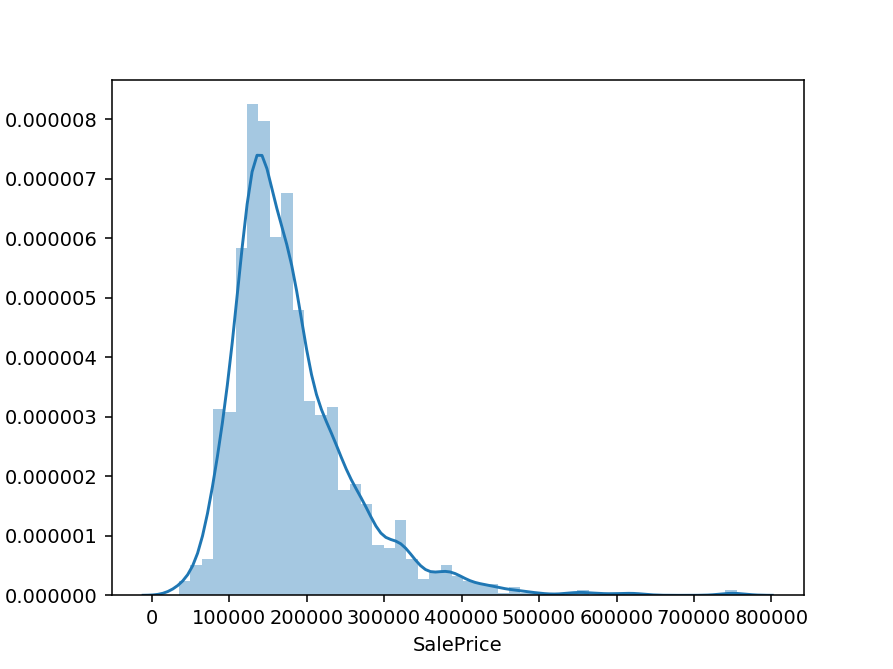

In [13]:
#房屋价格分布
seaborn.distplot(housing['SalePrice'])

<IPython.core.display.Javascript object>


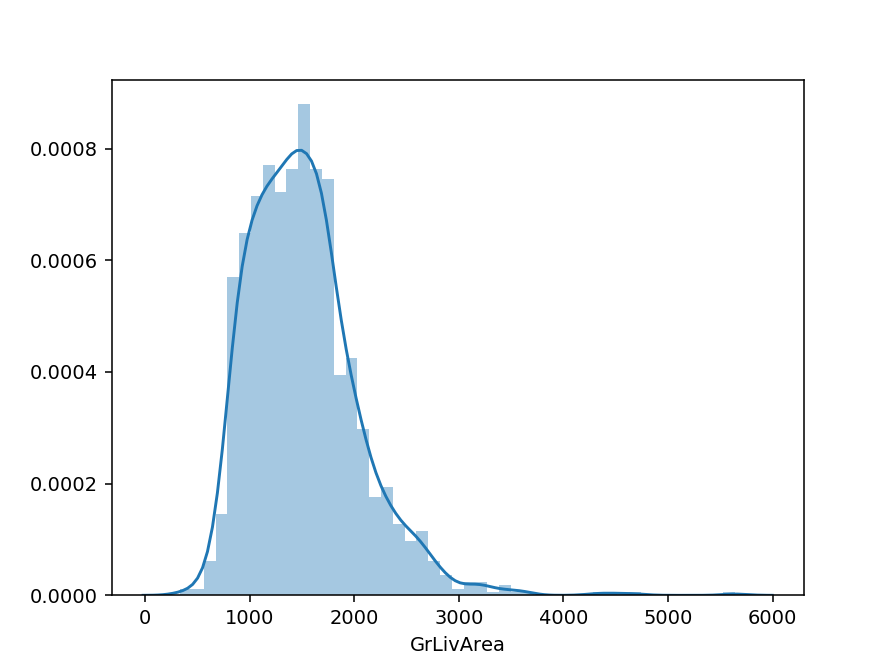

In [12]:
#居住面积分布
seaborn.distplot(housing['GrLivArea'])

<IPython.core.display.Javascript object>


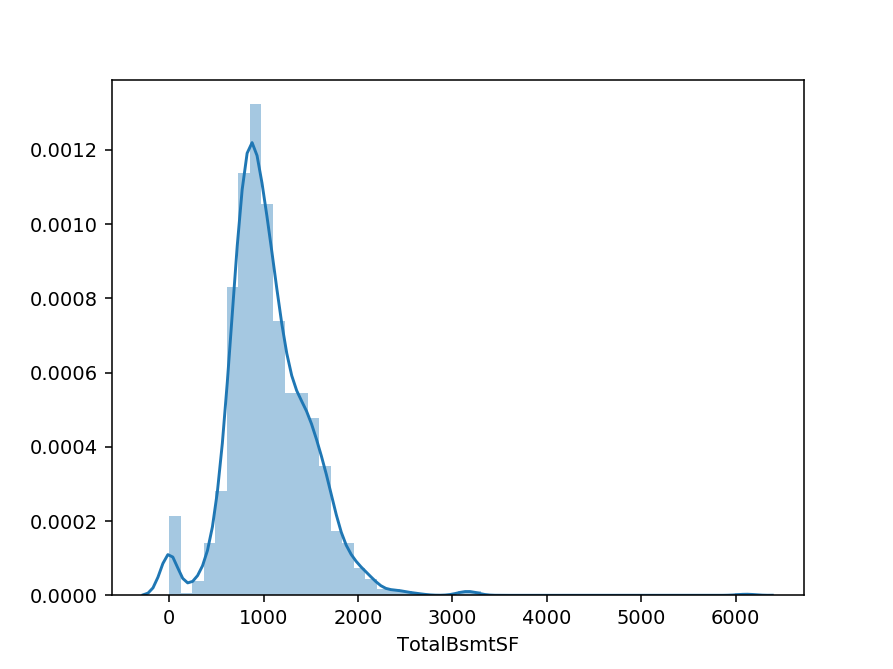

In [14]:
#地下室面积分布图
seaborn.distplot(housing['TotalBsmtSF'])

<IPython.core.display.Javascript object>


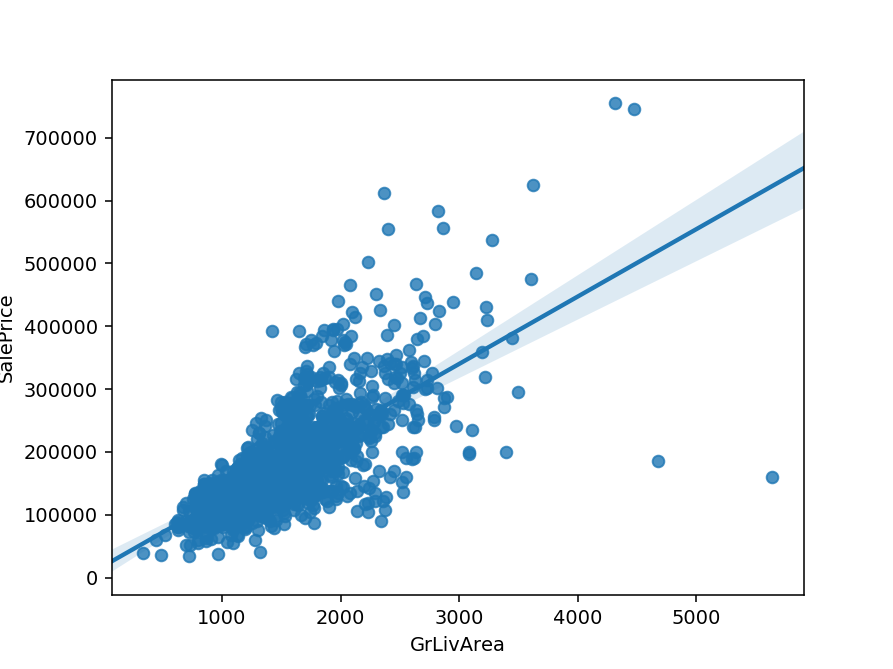

In [16]:
seaborn.regplot(x='GrLivArea', y='SalePrice', data=housing)

<IPython.core.display.Javascript object>


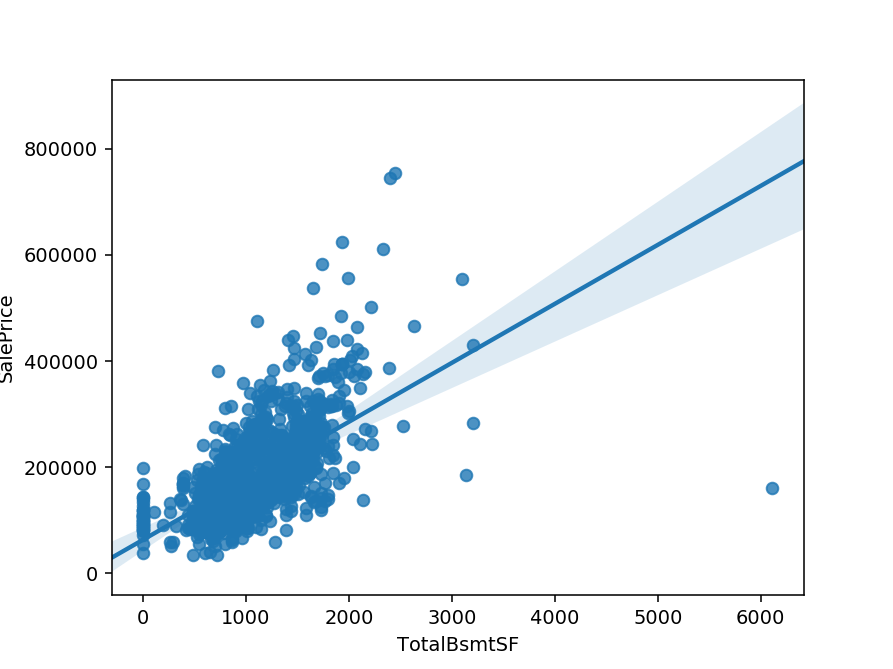

In [17]:
seaborn.regplot(x='TotalBsmtSF', y='SalePrice', data=housing)

<IPython.core.display.Javascript object>


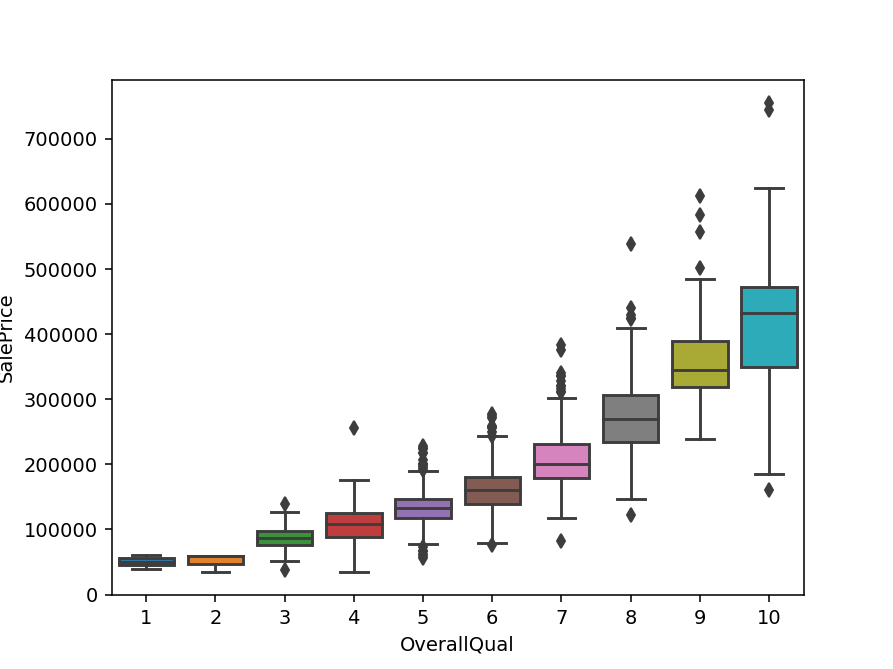

In [18]:
seaborn.boxplot(x='OverallQual', y='SalePrice', data=housing)

<IPython.core.display.Javascript object>


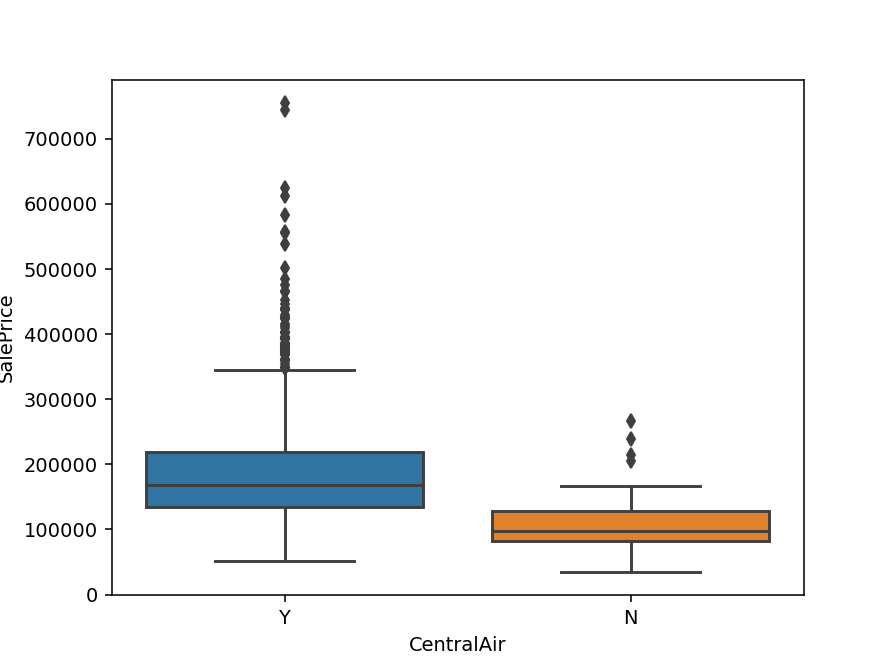

In [19]:
seaborn.boxplot(x='CentralAir', y='SalePrice', data=housing)

<IPython.core.display.Javascript object>


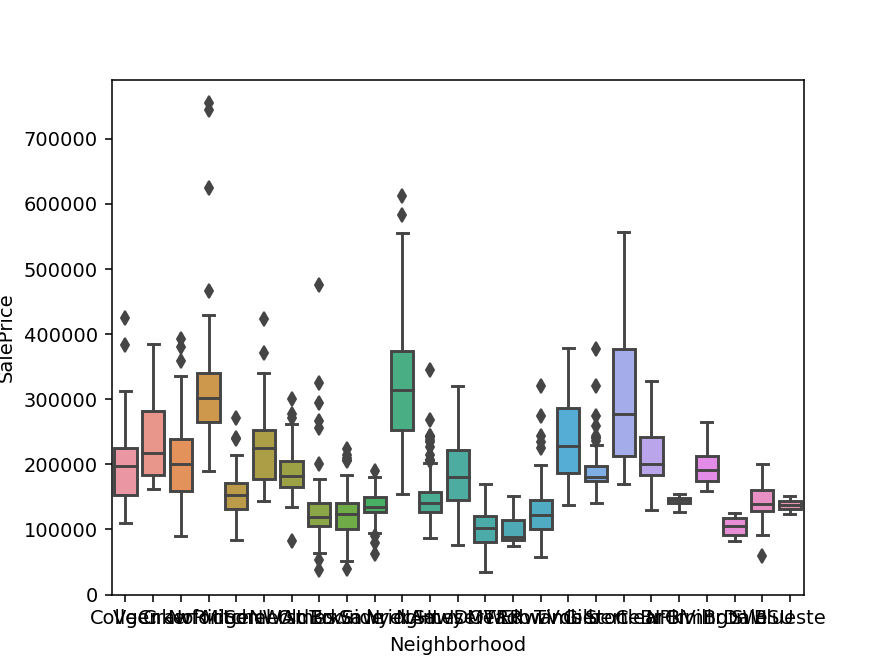

In [20]:
seaborn.boxplot(x='Neighborhood', y='SalePrice', data=housing)

<IPython.core.display.Javascript object>


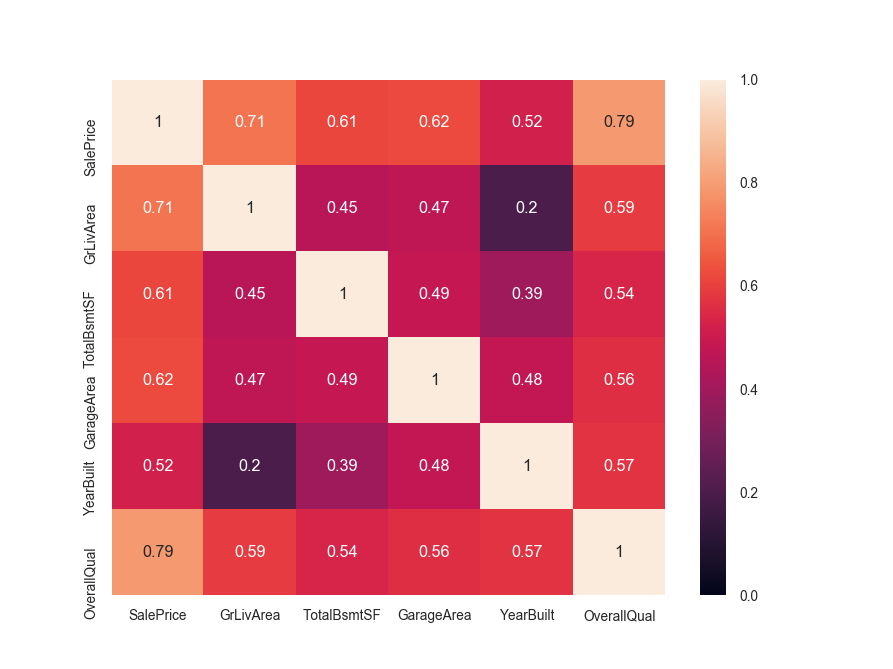

In [21]:
#挑选属性
info = ['SalePrice','GrLivArea','TotalBsmtSF','GarageArea','YearBuilt','OverallQual']
#把图形中的字体设置为原来的0.7倍
seaborn.set(font_scale = 0.7)
#首先使用.corr()方法计算属性之间的相关系数矩阵，再使用heatmap绘制热力图
#annot=True的作用是把相关系数在图中注释出来
seaborn.heatmap(housing[info].corr(), annot = True, vmin = 0, vmax = 1)

In [43]:
features = ['GrLivArea','TotalBsmtSF','GarageArea','YearBuilt','OverallQual']
target = 'SalePrice'
lr = LinearRegression()
rf = RandomForestRegressor(100)

models = [lr, rf]

for model in models:
    scores = -cvs(model, housing[features], housing[target], cv = 5, scoring = 'neg_mean_absolute_error')

    print(type(model).__name__, numpy.mean(scores))

LinearRegression 24462.4780632
RandomForestRegressor 20784.8074945
